# Model evaluation: SVM (emotion)

---

## Table of Contents

1. [Imports](#imports)
2. [Model loading](#model-loading)
3. [Data loading and tokenization](#data-loading-and-tokenization)
4. [Evaluation](#evaluation)
5. [Report](#report)

# Imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
MAX_FEATURES = 20000

# Model loading

In [4]:
model_path = './SVM_emotion_model/svm_emotion_model.pkl'
vectorizer_path = './SVM_emotion_model/tfidf_vectorizer.pkl'

In [5]:
model = joblib.load(model_path)
vectorizer = joblib.load(vectorizer_path)

# Data loading and tokenization

In [6]:
base_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), '..'))
test_file = os.path.join(base_dir, 'test_emotion.csv')

test_data = pd.read_csv(test_file)
X_test_texts = test_data['text']
y_test = test_data['label'].values

In [7]:
X_test = vectorizer.transform(X_test_texts)

# Evaluation

In [8]:
y_test_pred = model.predict(X_test)

# Report

In [9]:
class_names = ['Smutek', 'Radość', 'Miłość', 'Złość', 'Strach', 'Zaskoczenie']

In [10]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

      Smutek       0.94      0.88      0.91      2500
      Radość       0.94      0.86      0.90      2500
      Miłość       0.89      0.97      0.93      2500
       Złość       0.92      0.91      0.92      2500
      Strach       0.90      0.86      0.88      2500
 Zaskoczenie       0.86      0.97      0.92      2206

    accuracy                           0.91     14706
   macro avg       0.91      0.91      0.91     14706
weighted avg       0.91      0.91      0.91     14706


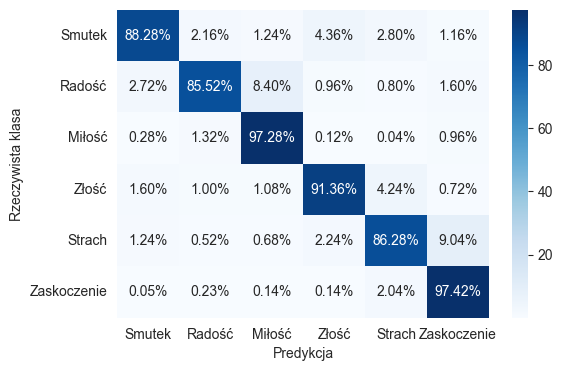

In [11]:
cm = confusion_matrix(y_test, y_test_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
labels = np.array([["{0:.2f}%".format(value) for value in row] for row in cm_percent])

plt.figure(figsize=(6, 4))
sns.heatmap(cm_percent, annot=labels, fmt="", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel("Predykcja")
plt.ylabel("Rzeczywista klasa")
plt.savefig("cf_mat_svm_emotion.png", dpi=300, bbox_inches='tight', facecolor='white')  
plt.show()

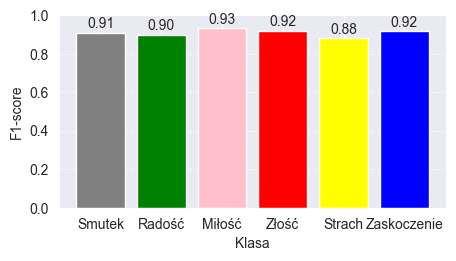

In [13]:
report = classification_report(y_test, y_test_pred, output_dict=True, target_names=class_names)
f1_scores = [report[label]['f1-score'] for label in class_names]

plt.figure(figsize=(5, 2.5))
bars = plt.bar(class_names, f1_scores, color=['gray', 'green', 'pink', 'red', 'yellow', 'blue'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.ylim(0, 1.0)
plt.ylabel('F1-score')
plt.xlabel('Klasa')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("f1_bar_svm_emotion.png", dpi=300, bbox_inches='tight', facecolor='white')  
plt.show()